<a href="https://colab.research.google.com/github/NadeemQazi/ML-on-Spark/blob/master/convirusAnalysis1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# this is analysis of the convirusdata set. started 15 March 2020  Acopy is also being save in github nadeemhqazi@gmail.com account


### I will be using spark for this work. the first few lines are for the installation of the spark in the Google Colab

# <h1><center><b> Corna Virus Data Visualisation !</center></h1>


In [8]:
csvfileworldwide="COVID-19-27March.csv"#"COVID-19-24Ma-worldwide.csv"#"COVID19-22Mar-worldwide.csv"#"COVID-19-21Mar-worldwide.csv"#"COVID-19-worldwide-2020-03-17.csv" COVID-19-21Mar-worldwide
DataDate= "27 March 2020"
from google.colab import drive
drive.mount('/content/drive')
!pip install import-ipynb
import import_ipynb
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import psycopg2 as ps
import ipywidgets as widgets
 # back end of ipywidgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
from ipywidgets import Text
import ipywidgets as widgets
import datetime
from IPython.display import clear_output
print ("Now Intializing")
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark
print("setting Java Environment")
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-2.4.5-bin-hadoop2.7"
print("Now Setting spark Environment")
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import row_number
from pyspark.sql.functions import datediff
    
from pyspark.sql.functions import col
from pyspark.sql.functions import to_date
from pyspark.sql.functions import desc
spark = SparkSession.builder.master("local[4]").appName("example").enableHiveSupport().getOrCreate()
spark.version

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Now Intializing
setting Java Environment
Now Setting spark Environment


'2.4.5'

# Define Functions and SQL Queries for Visualisation

In [9]:

############################################################################
print ("Now  Defining Visulisation Functions using Seaborn") 
def HorizBar(xAxis,yAxis,df):
    plt.figure(figsize=(16,16))
    sns.barplot(x = xAxis, y = yAxis,data=df)
  
##############################################################################
def PlotBar(figwdth,xAxis,YAxis,mutedxaxis,Pyspark_df,x_limit,Xlabel,MutedXLabel,x_rot,y_rot) :
    fighgt=int (Pyspark_df.count()*.65) # setting fig heighr 
    df=Pyspark_df.toPandas()
    if fighgt <1:
      fighgt=1
################################################################################
def ShowInteractivePlotBar(D_dff,title):
    PlotBar(25,"Cases","Countries","Deaths",D_dff,int(Xlimit),"Corona Cases","Deaths",40,30,title)
    print("WW")
################################################################################ Read CSV  
def ReadThisCsv(csvfile):
    csvfilePath='drive/My Drive/Datasets/cornavirusDataset_Kaggle/'+csvfile
    dataset=spark.read.csv(csvfilePath,inferSchema=True,header=True)
    #for col in dataset.columns:
      #print(col,"Total Null:",dataset.where(dataset[col].isNull()).count())
    return dataset  
#################################################################################
def PlotBar(figwdth,xAxis,YAxis,mutedxaxis,Pyspark_df,x_limit,Xlabel,MutedXLabel,x_rot,y_rot,title) :
    fighgt=int (Pyspark_df.count()*.65) # setting fig heighr 
    df=Pyspark_df.toPandas()
    if fighgt <1:
      fighgt=1

  #print("Total Records found",df.count())
#muted be over the unmiters i,e over first plot
    sns.set(style="whitegrid")
    sns.set_context('notebook')
# Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(figwdth, fighgt))
# Plot the total crashes
    sns.set_color_codes("pastel")
  #sns.set_color_codes("dark")

    g=sns.barplot(x=xAxis, y=YAxis, data=df, color="y",label=Xlabel,edgecolor = 'b',linewidth=2)
  #for index, row in df.iterrows():
     #print(row.name,row.Cases)
     #g.text(row.name,row.Cases, "txt", color='black', ha="center")
    for p in g.patches:
        
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        #g.annotate(int(p.get_width()), (x, y))   
  

# Plot the crashes where alcohol was involved
    sns.set_color_codes("muted")
  #sns.set_color_codes("bright")

    h= sns.barplot(x=mutedxaxis, y=YAxis, data=df,
            label=MutedXLabel, color="r",edgecolor = 'b',linewidth=2)
    for pp in h.patches:
        xx=pp.get_x()+ pp.get_width()+0.02
        yy=pp.get_y()+ pp.get_height()/2
        hvalue=(int(pp.get_width())) 
        
        h.annotate(hvalue,(xx,yy))
# Add a legend and informative axis label
    ax.legend(ncol=1, loc="upper right", frameon=True)
 
    ax.set(xlim=(0, x_limit), ylabel="",xlabel=Xlabel)
  
    sns.despine(left=True, bottom=True)
    plt.xticks(rotation =x_rot,fontsize =14)
    plt.yticks(rotation =y_rot,fontsize =14)
    plt.title(title,fontsize=14)
    #plt.text(900,2, "Bar Plot", fontsize = 95, color='Black', fontstyle='italic')
# Combining Latitude and longitude into Coravirus dataset

#######################################################################

print("Adding Lat and longitude")
#csvfileworldwide="COVID-19-24Ma-worldwide.csv"#"COVID19-22Mar-worldwide.csv"#"COVID-19-21Mar-worldwide.csv"#"COVID-19-worldwide-2020-03-17.csv" COVID-19-21Mar-worldwide
Covidworldwide=ReadThisCsv(csvfileworldwide)
Covidworldwide= Covidworldwide.withColumnRenamed("Countries and territories","Countries")
Covidworldwide.show(3)
csvfilelatlong="UKLatLong.csv"#"LatLong.csv"
CovidLongLat=ReadThisCsv(csvfilelatlong)
# combining two dataframe on single column using join
df1=Covidworldwide
df2=CovidLongLat
df4=df1.join(df2,df1.geoId==df2.country).select(df1["*"], df2.latitude,df2.longitude)
df4.printSchema()


# combining two dataframe on single column using join
df1=Covidworldwide
df2=CovidLongLat
df_LongLat=df1.join(df2,df1.geoId==df2.country).select(df1["*"], df2.latitude,df2.longitude)
df_LongLat.printSchema
##############################################################
print("Converting String to date type in cornavirus data set & creating Temp table for SQL")

from pyspark.sql.functions import col
from pyspark.sql.functions import to_date
from pyspark.sql.functions import desc

df5 = df_LongLat.select("DateRep","Day","Month","Year","Cases","Deaths","Countries",
                        "GeoId","latitude","longitude",to_date(df4.DateRep, 'dd/MM/yyyy').alias('convid_date'))
df5.registerTempTable('Convid_table')
############################################################# Extractio  first day of corona
print ("Extracting first conroa date and calcuate speed of the spread diseases and create a table for it")
print("select Grouping for staring datae",datetime.datetime.now())
from pyspark.sql.types import IntegerType
#1. TableCasesStart_DTE holds the dates including the starting date on the top for the cases ,uses Convid_table
#2: TblCovidSummary hold after sql queries starting date,end date  number of days passes since first appear and also the speed of spreadness totalcase/totaldays

dfStrDte=spark.sql("select min(cases) as StartCase,convid_date, Countries from Convid_Table Where cases >0  group by Countries,convid_date order by Countries,min(convid_date)  asc    ")
dfStrDte.registerTempTable("TblCasesStart_DTE")

print("extracting starting date",datetime.datetime.now())
sql= " SELECT * FROM TblCasesStart_DTE D WHERE convid_date = (SELECT min(convid_date) FROM TblCasesStart_DTE WHERE Countries = D.Countries) "
dfs=spark.sql(sql)

dfGrp=spark.sql("select sum(cases) as Cases,sum(Deaths) as Deaths,max(convid_date) as EndDate, Countries  from Convid_Table group by Countries order by Countries")

print("calcualting summary nested query",datetime.datetime.now())
dfsummary=dfs.join(dfGrp,dfs.Countries==dfGrp.Countries).select(dfs["*"], dfGrp.Cases,dfGrp.Deaths,dfGrp.EndDate,
                                                                datediff(dfGrp.EndDate,dfs.convid_date).alias("Total_days"),
                                                               (dfGrp.Cases/(datediff(dfGrp.EndDate,dfs.convid_date))).alias("Viruse_SpreadSpeed")                                                          #sum(Deaths)*100/sum(Cases).alias("Molaity")
                                                               
                                                               )
dfsummary = dfsummary.withColumn("Virus_SpreadSpeedint", dfsummary["Viruse_SpreadSpeed"].cast(IntegerType()))

dfsummary.registerTempTable("TblCovidSummary")
dfsummary.printSchema()
#spark.sql("select * from TblCovidSummary order by Cases").show(25)
#print(datetime.datetime.now())
clear_output()
dfsummary=spark.sql("select max(convid_date) as ReportDate ,min(convid_date),sum(cases) as TotalCases ,sum(Deaths) as TotalDeaths ,(sum(Deaths)*100/sum(Cases)) from TblCovidSummary  " )
ReportDate=dfsummary.select("ReportDate").collect()[0][0]
Total_worldWideCases=dfsummary.select("TotalCases").collect()[0][0]
Total_worldWideDeaths=dfsummary.select("TotalDeaths").collect()[0][0]
MortalityRate_worldwide=(Total_worldWideDeaths*100/Total_worldWideCases)
MortalityRate_worldwide=round(MortalityRate_worldwide,2)
from IPython.core.display import display, HTML
display(HTML('<h1>  <font color =Green size=12>  Summary As of Date: '+ str(ReportDate)+ ' </font> </h1>'))
display(HTML('<h1>  <font color =Blue size=12> Total World Cases: '+ str(Total_worldWideCases)+ ' </font> </h1>'))
display(HTML('<h1>  <font color =red size=12> Total World  Deaths: '+ str(Total_worldWideDeaths)+ ' </font> </h1>'))
display(HTML('<h1>  <font color =Purple size=12> Total World Mortality Rate: '+ str(MortalityRate_worldwide)+ '% </font> </h1>'))


# What is World Wide distribution of the Corona Cases  & Deaths

In [10]:
#Table used Convid_Table.
dfCountryGrp=spark.sql("select sum(cases) as Cases,sum(Deaths) as Deaths ,Countries  from Convid_Table group by Countries order by sum(cases) desc  ")
# this will be use as Xlimit on xaxis
Xlimit=dfCountryGrp.describe("Cases").filter("summary = 'max'").select("Cases").collect()[0][0]
df_IpyWidget=dfCountryGrp

def Corona_Cases_For(Greater_Than,Lower_Than,Corona):
   print(Greater_Than)
   Column=Corona
   df=df_IpyWidget.filter((df_IpyWidget[Column] > Greater_Than) & (df_IpyWidget[Column]<= Lower_Than))
   #df.show(df.count())
   if df.count() > 0:
    ShowInteractivePlotBar(df,"World Wide distribution of the Corona Cases & Deaths")
   else :
     print ("Not enough Records ,change the limit")
interact(Corona_Cases_For,Greater_Than=IntSlider(min=1, max=int(Xlimit), value=1000, step=1, continuous_update=False),
                      Lower_Than=IntSlider(min=1,max=int(Xlimit),value=5000,step=1,continuous_update=False),
         
                      Corona=widgets.Text(value='Cases',description='Cases/Deaths:',continuous_update=False))


interactive(children=(IntSlider(value=1000, continuous_update=False, description='Greater_Than', max=85991, mi…

<function __main__.Corona_Cases_For>

# Top Corona Cases or Deaths 

In [11]:

def show_TopCases(TopMost,Corona):
 
   Top=10
   if Corona=="Cases":

    Sql= "select sum(cases) as Cases,sum(Deaths) as Deaths ,Countries from Convid_Table group by Countries order by sum(cases) desc  Limit " + str(Top)
   else:
    Sql= "select sum(cases) as Cases,sum(Deaths) as Deaths ,Countries from Convid_Table group by Countries order by sum(Deaths) desc  Limit " + str(Top)
   TopCases=spark.sql(Sql)
   #TopCases.show()
   ShowInteractivePlotBar(TopCases,"Top affected Countries")
interact(show_TopCases,TopMost=IntSlider(min=1, max=20, value=10, step=1, continuous_update=False),
                      Corona=widgets.Text(value='Cases',description='Cases/Deaths:',continuous_update=False))

interactive(children=(IntSlider(value=10, continuous_update=False, description='TopMost', max=20, min=1), Text…

<function __main__.show_TopCases>

# Where did the Corona spread more quickly.

In [35]:

import plotly.express as px
#from plotly.offline import iplot, plot, download_plotlyjs, init_notebook_mode

dfpie=spark.sql("select * from TblCovidSummary where cases >800 order by Viruse_SpreadSpeed desc")
df = dfpie.toPandas()

TextTitle= "  Comparision of Corona Spread Speed Dated "+ str(ReportDate)

 

fig = px.scatter(df, y="Total_days", x="Cases",
	         size="Virus_SpreadSpeedint", color="Deaths",
                 hover_name="Viruse_SpreadSpeed", log_x=True, size_max=60,text="Countries"
                
                 )
fig.update_traces(textposition='top center')
fig.update_layout(height=1000,width=1300,title_text=TextTitle,showlegend=False,
                   font=dict(
        
        size=13
        #color="#ffffff"
    )
                  )

fig.show()



In [0]:
dfsummary=spark.sql("select max(convid_date) ,min(convid_date),sum(cases) as TotalCases ,sum(Deaths) as Total_Deaths ,(sum(Deaths)*100/sum(Cases)) from TblCovidSummary  " )
Total_worldWideCases=dfsummary.select("TotalCases").collect()[0][0]
Total_worldWideDeaths=dfsummary.select("TotalDeaths").collect()[0][0]
Mortality Rate_worldwide=Total_worldWideCases*100/Total_worldWideDeaths


In [0]:
def a(GT,LT,Cr):


  Corona_Relationship(1,11,7)

In [0]:
interact(a,GT=IntSlider(min=1, max=int(Xlimit), value=1000, step=1, continuous_update=False),
                      LT=IntSlider(min=1,max=int(Xlimit),value=5000,step=1,continuous_update=False),
                      Cr=widgets.Text(value='Cases',description='Cases/Deaths:',continuous_update=False))

## Query for Time Series 

In [0]:
def TotalCasesofaDay(CntName):
  from pyspark.sql.window import Window
  from pyspark.sql.functions import sum
  import seaborn as sns

  sql="select convid_date,Cases as Corona_Cases,Deaths,geoId from Convid_Table where geoId == ('" +  CntName + "')" + "  order by convid_date"
  dfCasesofDay=spark.sql(sql)
  #dfCasesofDay.show(100)
  return dfCasesofDay
  ############################################################################
def TotalCases(CntName):
  from pyspark.sql.window import Window
  from pyspark.sql.functions import sum
  import seaborn as sns

  sql="select convid_date,Cases,Deaths,geoId from Convid_Table where geoId == ('" +  CntName + "')" + "  order by convid_date"
 
  dfGiventCnt=spark.sql(sql)
  w1 = Window.partitionBy("geoid").orderBy("convid_date").rowsBetween(
    Window.unboundedPreceding,  # Take all rows from the beginning of frame
    Window.currentRow           # To current row
)
  df_TotalCases=dfGiventCnt.withColumn("Corona_Cases", sum("Cases").over(w1)).orderBy("convid_date") # Sort for easy inspection. Not necessary.show()
  #df_TotalCases.show(100)
  return df_TotalCases

In [0]:
def TotalCasesold(CntName):
  from pyspark.sql.window import Window
  from pyspark.sql.functions import sum
  import seaborn as sns

  sql="select convid_date,Cases,Deaths,geoId from Convid_Table where geoId == ('" +  CntName + "')" + "  order by convid_date"
 
  dfGiventCnt=spark.sql(sql)
  w1 = Window.partitionBy("geoid").orderBy("convid_date").rowsBetween(
    Window.unboundedPreceding,  # Take all rows from the beginning of frame
    Window.currentRow           # To current row
)
  df_TotalCases=dfGiventCnt.withColumn("Corona_Cases", sum("Cases").over(w1)).orderBy("convid_date") # Sort for easy inspection. Not necessary.show()
  #df_TotalCases.show(100)
  return df_TotalCases


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



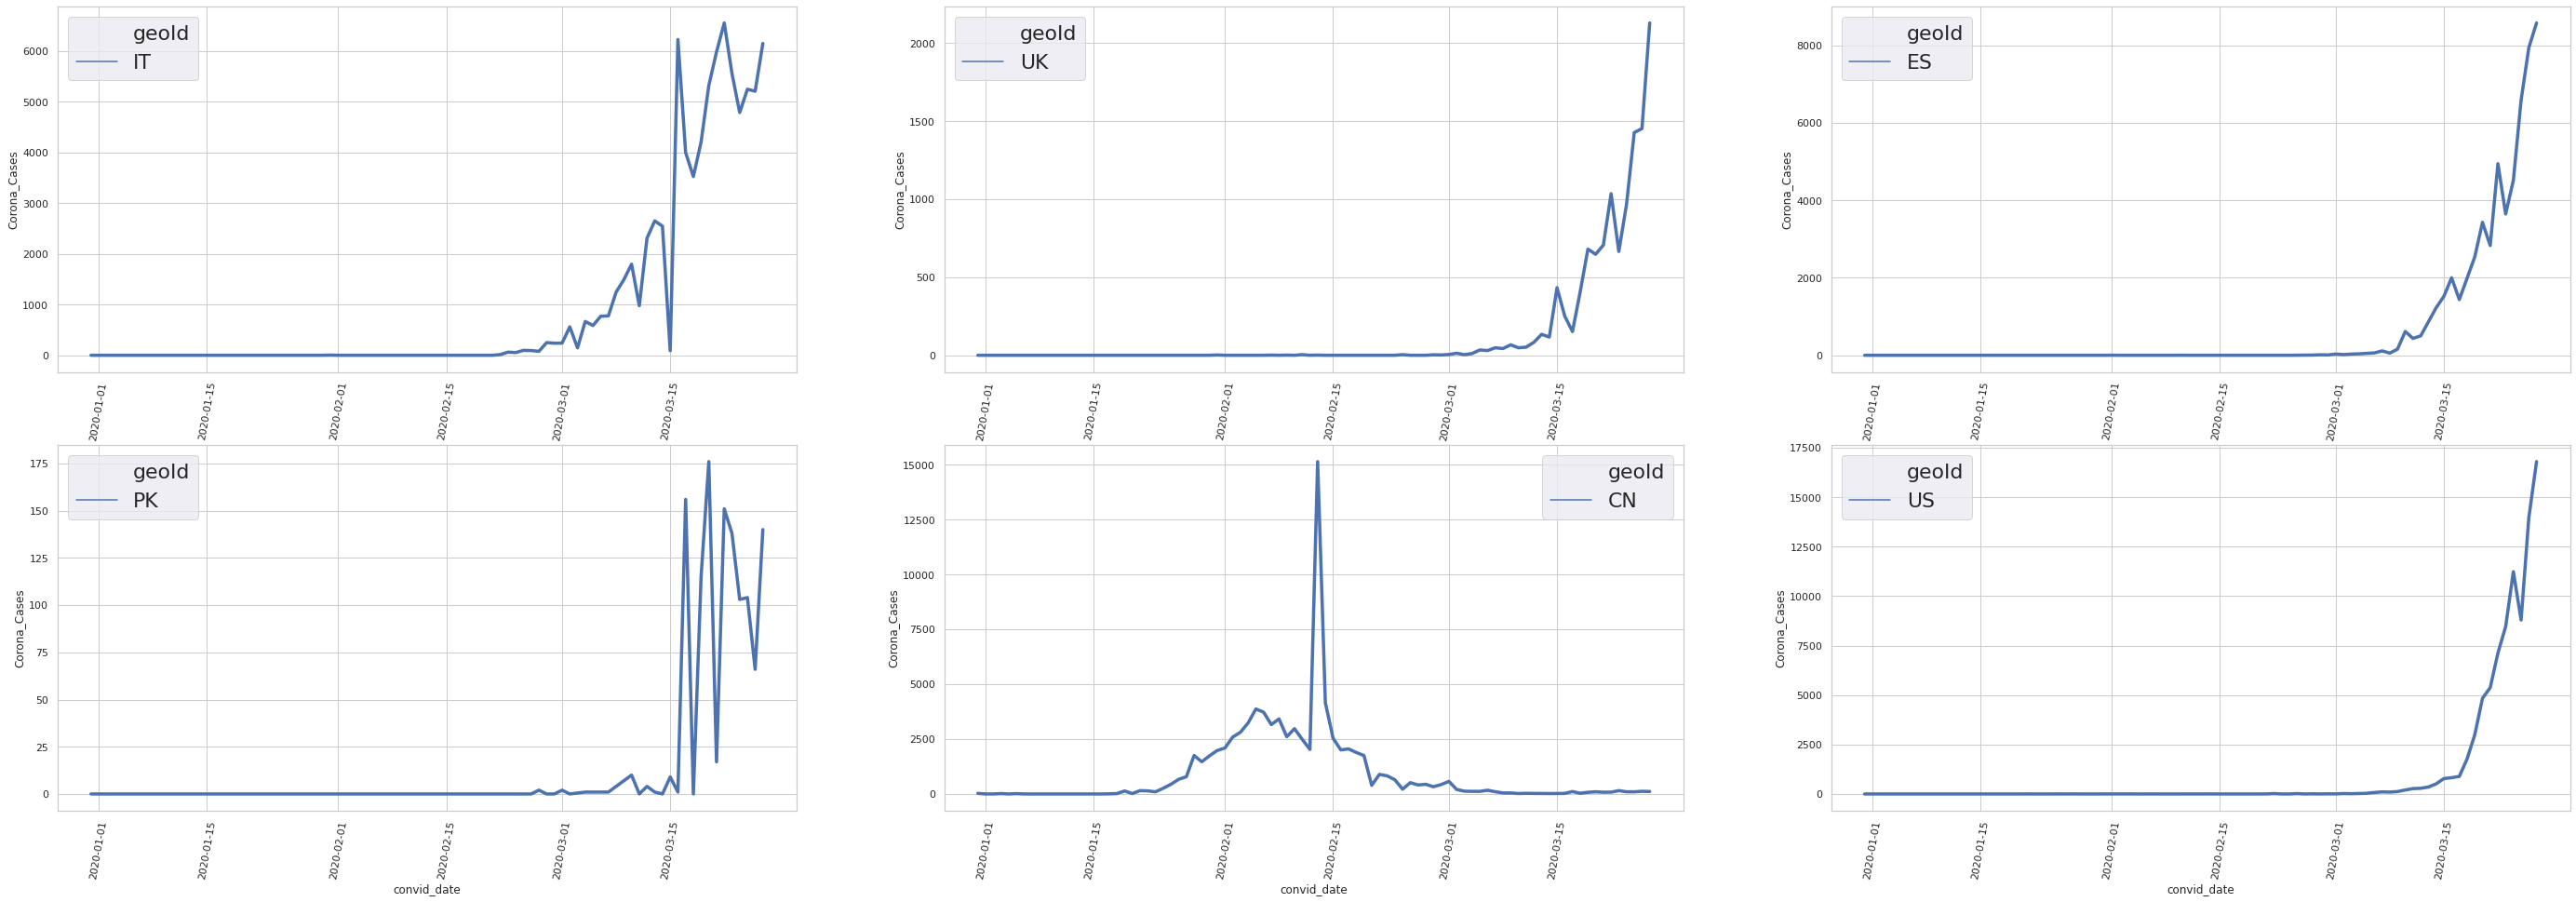

In [37]:
from pyspark.sql.window import Window
from pyspark.sql.functions import sum
import seaborn as sns
def ShowTotalCases(Countries):
  Axis=[]
  nCols=3 # mysettimg
  nRows=int(len(Countries)/nCols)
  fig,ax = plt.subplots(figsize=(20,5), ncols=nCols, nrows=nRows)

  
# Plot the responses for different events and regions
  if (nRows ==1):
    for i in range(nCols):
        ax[i].tick_params('x', labelrotation=90)
        Axis.append(ax[i])
      
  if (nRows>1):
    for i in range(nRows):

      for j in range(nCols):
        ax[i][j].tick_params('x', labelrotation=80)
       
        Axis.append(ax[i][j])

  sns.set(style="darkgrid")
  sns.set_context('notebook',font_scale=2.0)
  sns.set_color_codes("bright")
  #plt.title('Corona Virus Trend')
  plt.subplots_adjust(bottom=0.1, right=2.0, top=2.5)
  for i,Cnt in enumerate(Countries):
   
    dfTotal_cases=TotalCasesofaDay(Cnt)
    #dfTotal_cases.show(100)
    sns.lineplot(x="convid_date", y="Corona_Cases",data=dfTotal_cases.toPandas(),legend="full",Linewidth=3.5, color='blue',hue="geoId",ax=Axis[i])


ShowTotalCases(["IT","UK","ES","PK","CN","US"])

In [0]:
#https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
print(fmri)
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [0]:
tips_df = sns.load_dataset("tips")
type(tips_df.day)

#sns.barplot(x = tips_df.day, y = tips_df.total_bill)

In [0]:
csvfile="COVID19_line_list_data.csv"
listdataset=ReadThisCsv(csvfile)
print(len(listdataset.columns))

In [0]:
csvfile="time_series_covid_19_deaths.csv"
deathdataset=ReadThisCsv(csvfile)
print(len(deathdataset.columns))



In [0]:
csvfile="time_series_covid_19_confirmed.csv"

confirmdeddataset=ReadThisCsv(csvfile)
#confirmdeddataset.printSchema()
print(len(confirmdeddataset.columns))

In [0]:
# this is for Data  visulisation 
#https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=YPl0lG9PtiXa
#https://medium.com/@rokaandy/python-data-visualization-heatmaps-79fa7506c410
#https://cmdlinetips.com/2019/01/how-to-make-heatmap-with-seaborn-in-python/
#http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
#https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

import matplotlib.pyplot as plt

plt.style.use('classic')

%matplotlib inline

import numpy as np

import pandas as pd

# Create some data

rng = np.random.RandomState(0)

x = np.linspace(0, 10, 500)

y = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults

plt.plot(x, y)

plt.legend('ABCDEF', ncol=2, loc='upper left');

import seaborn as sns

sns.set()

# same plotting code as above!

plt.plot(x, y)

plt.legend('ABCDEF', ncol=2, loc='upper left');

In [0]:
#importing all the libraries needed
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tips_df = sns.load_dataset('tips')
tips_df.head()
#https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
#https://matplotlib.org/examples/color/colormaps_reference.html


In [0]:
#https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
print(fmri)
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [0]:
sns.heatmap(tips_df.corr(), annot = True,vmin=-1, vmax=1, center= 0, cmap='BuPu', linewidths=3, linecolor='black',square=True)
tips_df.count
tips_df.corr()